##### Breake Image Into RATIOS |  

In [41]:
import os
from PIL import Image
import numpy as np

def break_image_to_dynamic_grid(image_path, output_folder, ratios):
    original_image = Image.open(image_path)
    original_array = np.array(original_image)
    rows, cols = original_array.shape[:2]

    for ratio in ratios:
        height_ratio, width_ratio = ratio
        min_size = min(rows, cols)
        max_size = min(20, min_size)  # Ensure max size is within the specified range

        # Calculate dynamic cell size based on the specified ratio
        cell_height = np.random.randint(6, max_size)
        cell_width = int(cell_height * width_ratio / height_ratio)

        # Ensure cell size is within the image bounds
        if cell_height >= rows or cell_width >= cols:
            continue

        # Calculate the number of rows and columns for the dynamic grid
        num_rows = int(rows / cell_height)
        num_cols = int(cols / cell_width)

        # Ensure the output folder exists
        output_folder_path = os.path.join(output_folder, f'Ratio_{height_ratio}_{width_ratio}')
        os.makedirs(output_folder_path, exist_ok=True)

        # Break the image into a dynamic grid
        for i in range(num_rows):
            for j in range(num_cols):
                cell = original_array[i * cell_height: (i + 1) * cell_height,
                                       j * cell_width: (j + 1) * cell_width]

                cell_image = Image.fromarray(cell.astype(np.uint8))
                cell_image.save(os.path.join(output_folder_path, f'cell_{i}_{j}.png'))

# Example usage
input_image_path = r'D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\Recs&Stego\STEGO_Rect_OVERLAP\1__LSB1__OVR_Rect.png'  # Replace with the path to your input image
output_folder = r'D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\\Test\Grid_Images'  # Replace with the desired output folder
ratios = [
    (1, 2),
    (2, 1),
    (1, 1),
    (3, 1),
    (1, 3)
]

break_image_to_dynamic_grid(input_image_path, output_folder, ratios)


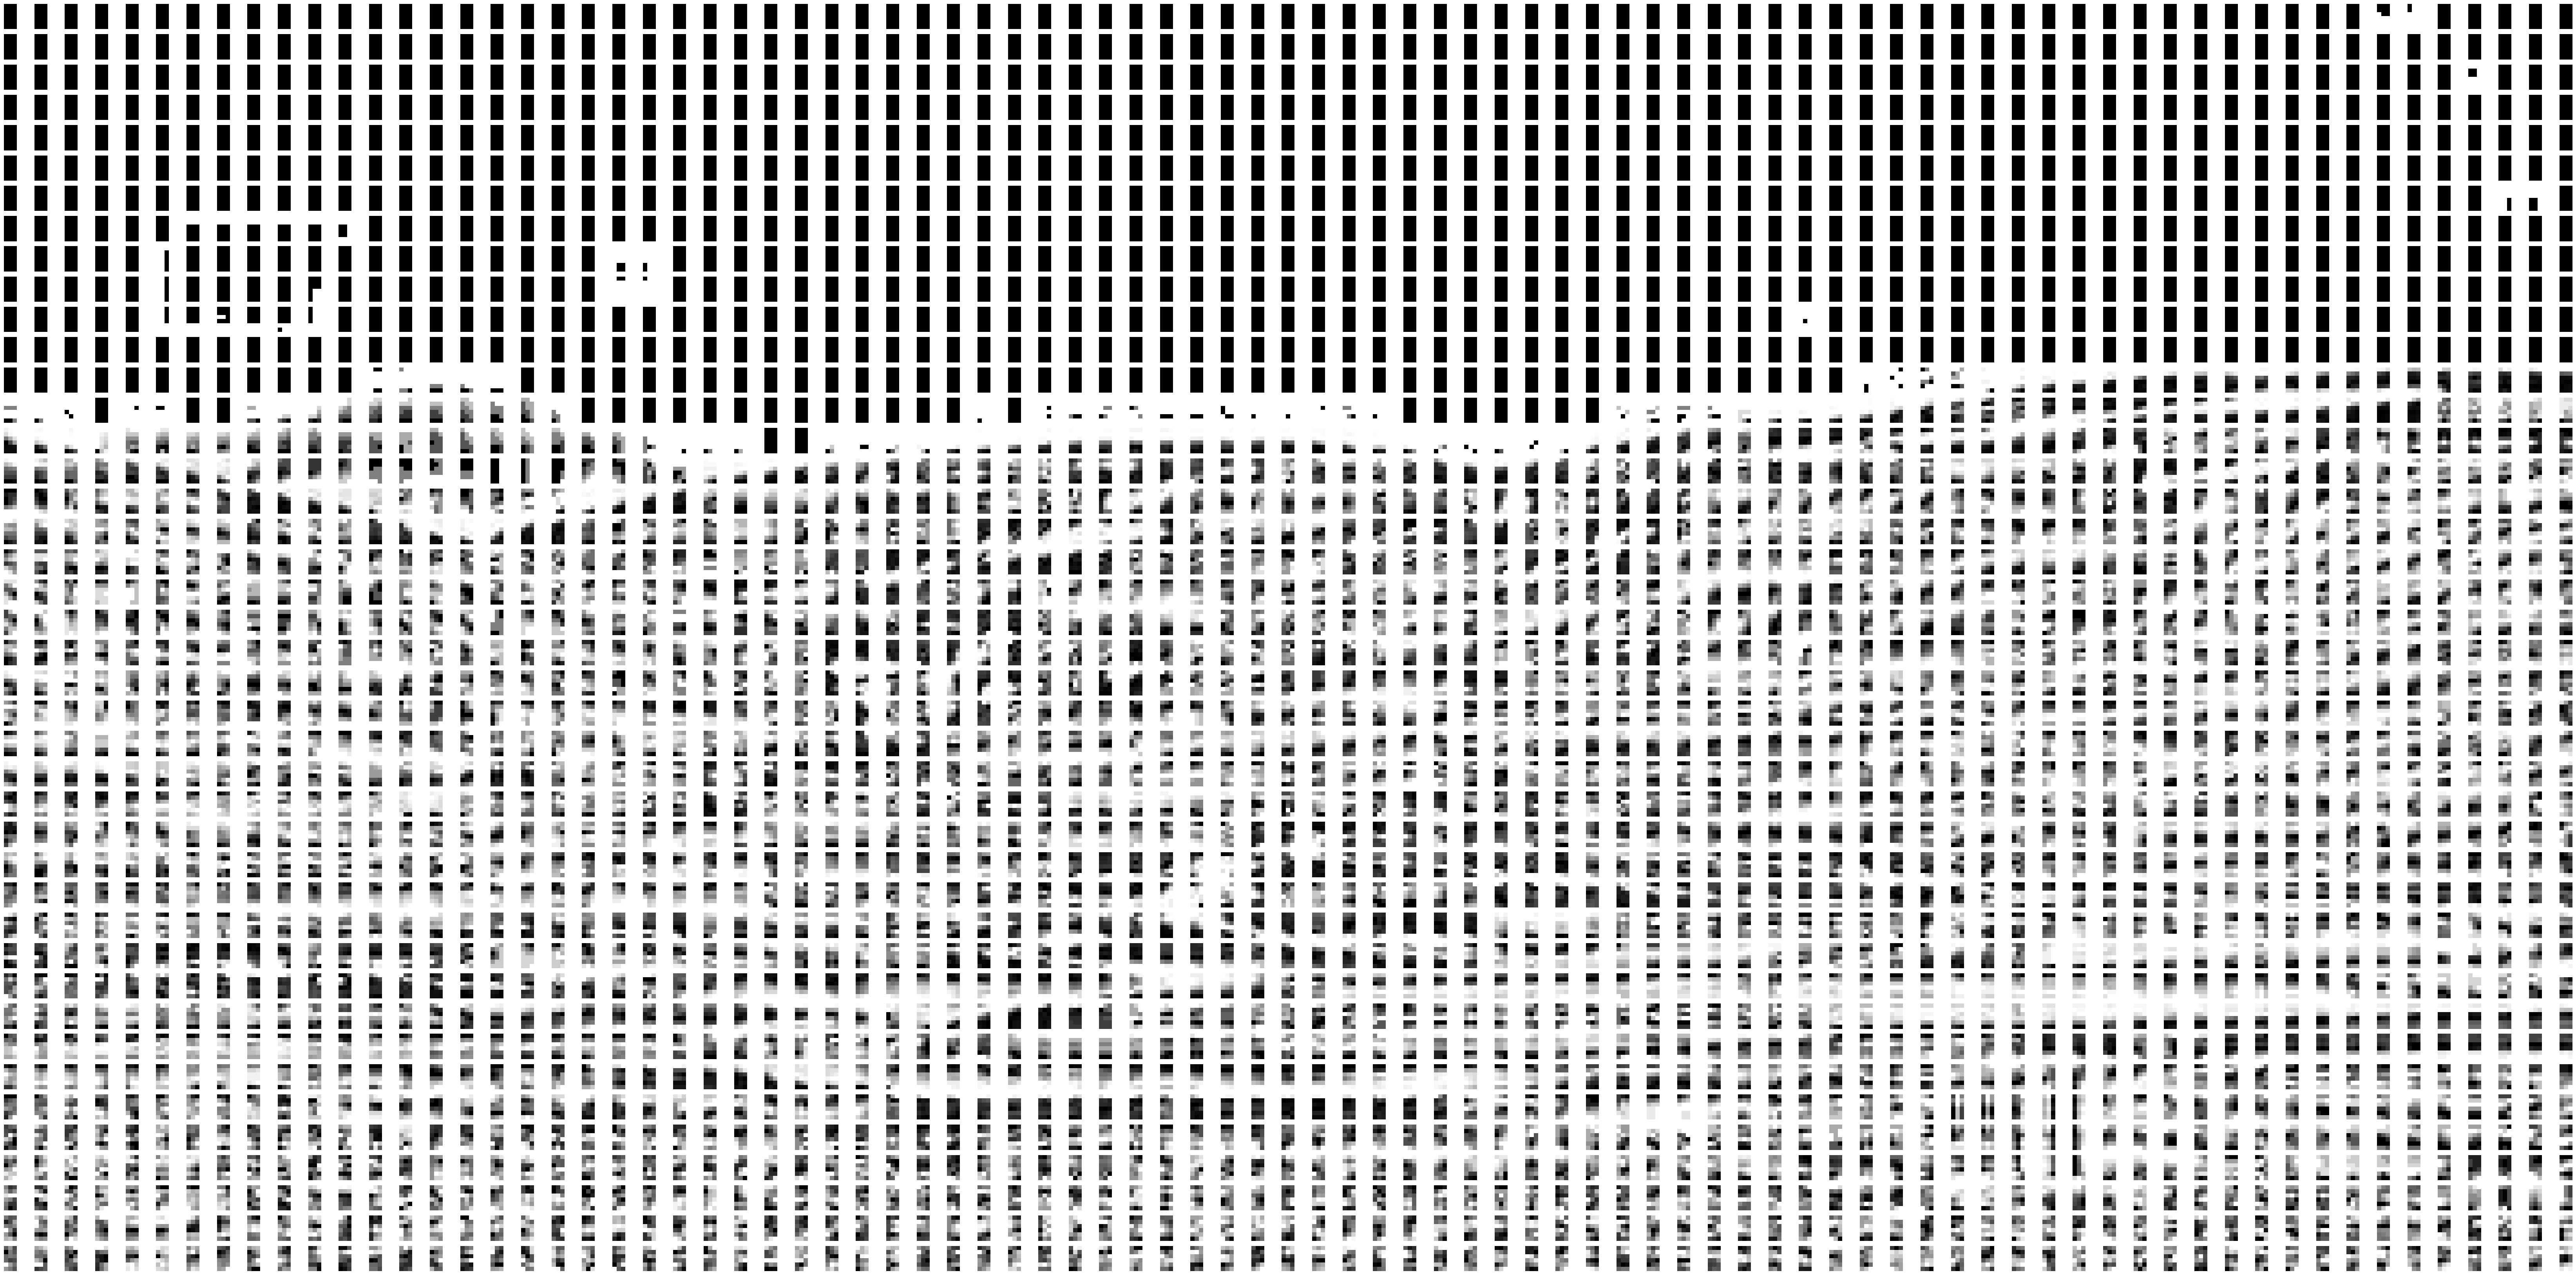

In [42]:
import os
import matplotlib.pyplot as plt
import math

def calculate_grid_and_cell_size(output_folder):
    # Get the list of image files in the output folder
    image_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

    if not image_files:
        raise ValueError("No image files found in the output folder.")

    # Assuming the image files are named in the format 'cell_i_j.png'
    i_values = [int(file.split('_')[1]) for file in image_files]
    j_values = [int(file.split('_')[2].split('.')[0]) for file in image_files]

    # Calculate the grid size and cell size based on the maximum i and j values
    max_i = max(i_values)
    max_j = max(j_values)
    grid_size = (max_i + 1, max_j + 1)

    # Assuming the images are square, so we use the first image to get the cell size
    first_image_path = os.path.join(output_folder, image_files[0])
    first_image = plt.imread(first_image_path)
    cell_size = first_image.shape[:2]

    return grid_size, cell_size

def show_cells_dynamically(output_folder):
    # Calculate the grid size and cell size
    grid_size, cell_size = calculate_grid_and_cell_size(output_folder)

    # Create a subplot for each cell
    fig, axes = plt.subplots(*grid_size, figsize=(grid_size[1], grid_size[0]))

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            file_path = os.path.join(output_folder, f'cell_{i}_{j}.png')
            cell_image = plt.imread(file_path)

            # Display the cell
            axes[i, j].imshow(cell_image, cmap='gray')
            axes[i, j].axis('off')

    plt.show()

# Example usage
output_folder_dynamic = r'D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\Test\Grid_Images\Ratio_2_1'
show_cells_dynamically(output_folder_dynamic)


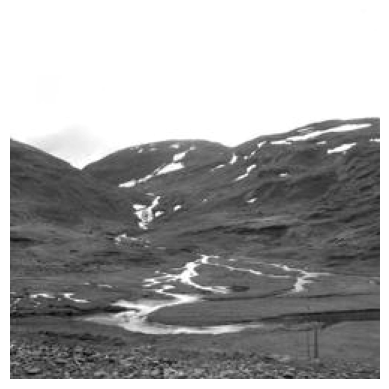

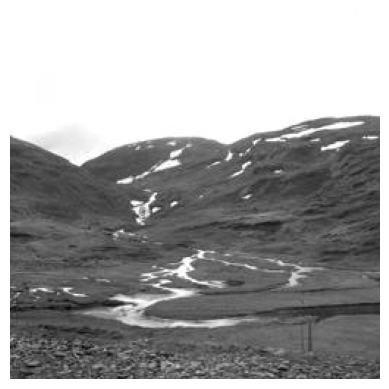

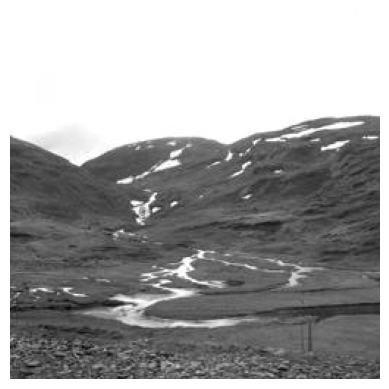

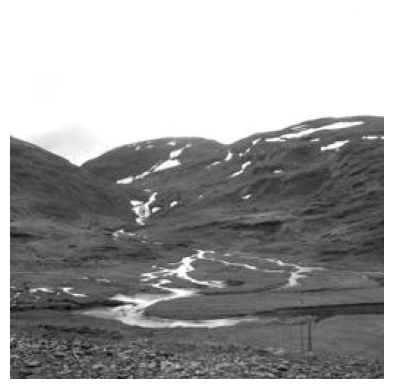

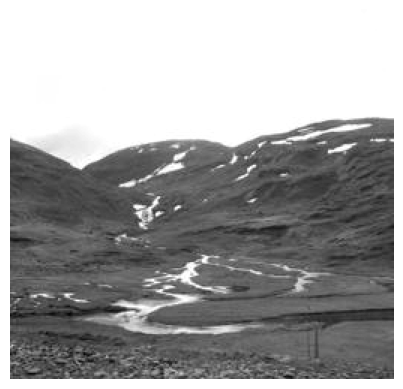

In [46]:
import os
import numpy as np
from PIL import Image

def merge_cells_dynamic(input_folder):
    # Get the list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]

    if not image_files:
        raise ValueError("No image files found in the input folder.")

    # Sort the image files to get them in the correct order
    image_files.sort(key=lambda x: (int(x.split('_')[1]), int(x.split('_')[2].split('.')[0])))

    # Assuming the images are square, so we use the first image to get the cell size
    first_image_path = os.path.join(input_folder, image_files[0])
    first_image = np.array(Image.open(first_image_path))
    cell_size = first_image.shape[:2]

    # Calculate the grid size based on the maximum i and j values
    max_i = int(image_files[-1].split('_')[1].split('.')[0])
    max_j = int(image_files[-1].split('_')[2].split('.')[0])
    grid_size = (max_i + 1, max_j + 1)

    # Initialize the original image with all white pixels
    if len(first_image.shape) == 2:  # Grayscale image
        original_image = np.ones((grid_size[0] * cell_size[0], grid_size[1] * cell_size[1]), dtype=np.uint8) * 255
    else:  # RGB image
        original_image = np.ones((grid_size[0] * cell_size[0], grid_size[1] * cell_size[1], first_image.shape[2]), dtype=np.uint8) * 255

    # Iterate over all cells and merge them into the original image
    for image_file in image_files:
        i = int(image_file.split('_')[1])
        j = int(image_file.split('_')[2].split('.')[0])

        file_path = os.path.join(input_folder, image_file)
        cell_image = np.array(Image.open(file_path))

        # Calculate the coordinates for merging
        start_row = i * cell_size[0]
        start_col = j * cell_size[1]
        end_row = start_row + cell_size[0]
        end_col = start_col + cell_size[1]

        # Check if the cell image shape matches the expected cell size
        if cell_image.shape[:2] != cell_size:
            # Resize the cell image to match the expected cell size
            cell_image = np.array(Image.fromarray(cell_image).resize((cell_size[1], cell_size[0])))

        # Merge the cell into the original image
        if len(first_image.shape) == 2:  # Grayscale image
            original_image[start_row:end_row, start_col:end_col] = cell_image
        else:  # RGB image
            original_image[start_row:end_row, start_col:end_col, :] = cell_image

    return original_image



input_folder = r'D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\Test\Grid_Images'
Folders = ['Ratio_1_1','Ratio_1_2','Ratio_1_3','Ratio_2_1','Ratio_3_1']
for folder in Folders:
    input_folder_dynamic = os.path.join(input_folder, folder)
    result_image_dynamic = merge_cells_dynamic(input_folder_dynamic)
    l = len(input_folder_dynamic)
    i = input_folder_dynamic[l-1]
    j = input_folder_dynamic[l-3]
    output_path_dynamic = rf'D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\Test\Grid_Images\merged_image_{i}{j}.png'
    Image.fromarray(result_image_dynamic).save(output_path_dynamic)
    plt.imshow(result_image_dynamic, cmap='gray')
    plt.axis('off')
    plt.show()


In [39]:
import os
import numpy as np
from PIL import Image

def merge_cells_dynamic(input_folder, ratios):
    # Get the list of image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]

    if not image_files:
        raise ValueError("No image files found in the input folder.")

    # Sort the image files to get them in the correct order
    image_files.sort(key=lambda x: (int(x.split('_')[1]), int(x.split('_')[2].split('.')[0])))

    # Assuming the images are square, so we use the first image to get the cell size
    first_image_path = os.path.join(input_folder, image_files[0])
    first_image = np.array(Image.open(first_image_path))
    cell_size = first_image.shape[:2]

    # Calculate the grid size based on the maximum i and j values
    max_i = int(image_files[-1].split('_')[1].split('.')[0])
    max_j = int(image_files[-1].split('_')[2].split('.')[0])
    grid_size = (max_i + 1, max_j + 1)

    # Initialize the original image with all white pixels
    original_image = np.ones((grid_size[0] * cell_size[0], grid_size[1] * cell_size[1]), dtype=np.uint8) * 255

    # Iterate over all cells and merge them into the original image
    for image_file in image_files:
        i = int(image_file.split('_')[1])
        j = int(image_file.split('_')[2].split('.')[0])

        file_path = os.path.join(input_folder, image_file)
        cell_image = np.array(Image.open(file_path))

        # Calculate the coordinates for merging
        start_row = i * cell_size[0]
        start_col = j * cell_size[1]
        end_row = (i + 1) * cell_size[0]
        end_col = (j + 1) * cell_size[1]

        # Resize the cell image to match the expected cell size
        cell_image = np.array(Image.fromarray(cell_image).resize((cell_size[1], cell_size[0])))

        # Merge the cell into the original image
        original_image[start_row:end_row, start_col:end_col] = cell_image

    return original_image

# Example usage
input_folder = r'D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\Test\Grid_Images\Ratio_1_2'  # Replace with the path to your broken images
output_path_dynamic = r'D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\Test\Reconstructed_Image.png'  # Replace with the desired output path
ratios = [
    (1, 2),
    (2, 1),
    (1, 1),
    (3, 1),
    (1, 3)
]

result_image_dynamic = merge_cells_dynamic(input_folder, ratios)
Image.fromarray(result_image_dynamic).save(output_path_dynamic)


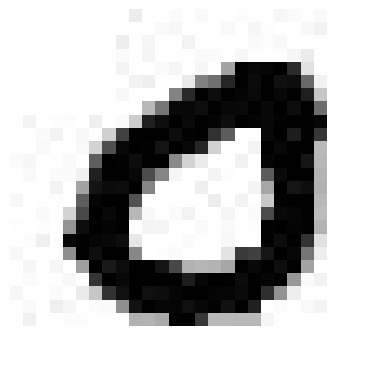

Image size: (28, 28)


In [55]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\shova\Downloads\Compressed\trainingSet\trainingSet\0\img_635.jpg"  # Replace with the actual path to your image file
image = Image.open(image_path)

# Display the image
plt.imshow(image,cmap='gray_r')
plt.axis('off')  # Turn off axis labels
plt.show()

# Print the size of the image
image_size = image.size
print(f"Image size: {image_size}")


In [62]:
from PIL import Image
import numpy as np

# Encoder 
def encode_rectangle(image_path, payload):
    original_image = Image.open(image_path)
    secret_array = np.array(payload.convert('L'))  # Convert payload to grayscale
    original_array = np.array(original_image)

    print(f"Original Image Size: {original_array.shape}")
    print(f"Payload Image Size: {secret_array.shape}")

    # Ensure the payload image is the same size or smaller than the original image
    if secret_array.shape[0] > original_array.shape[0] or secret_array.shape[1] > original_array.shape[1]:
        raise ValueError("Payload image should be smaller or equal in size to the original image.")

    # Iterate through the payload image and embed it in the LSB of the original image
    for y in range(secret_array.shape[0]):
        for x in range(secret_array.shape[1]):
            original_pixel = original_array[y, x]
            secret_pixel = secret_array[y, x]
            modified_pixel = (original_pixel & 0b1111111111111110) | (secret_pixel & 1)
            original_array[y, x] = modified_pixel

    steganographic_image = Image.fromarray(original_array)
  
    return steganographic_image

# Paths to images
input_folder = r"C:\Users\shova\Downloads\Compressed\trainingSet\trainingSet\0\img_635.jpg" 
image_path =r"D:\IEM\SEM3\Project\CREATE_LSB_Stego_dataset\NEWDATASET2\ORG\BIT_MNIPULATED\2__LSB1.png" 
 
output_image_path = 'mniat.png'

# Load the original image
original_image = Image.open(image_path)
print(f"Original Image Mode: {original_image.mode}")

# Load the smaller image to hide
payload_image = Image.open(input_folder)
print(f"Payload Image Mode: {payload_image.mode}")

# Encode the payload image into the original image
result_image = encode_rectangle(image_path, payload_image)

# Save the result image
result_image.save(output_image_path)


Original Image Mode: L
Payload Image Mode: L
Original Image Size: (256, 256)
Payload Image Size: (28, 28)


Original Image Mode: L
Payload Image Mode: L
Original Image Size: (256, 256)
Payload Image Size: (28, 28)


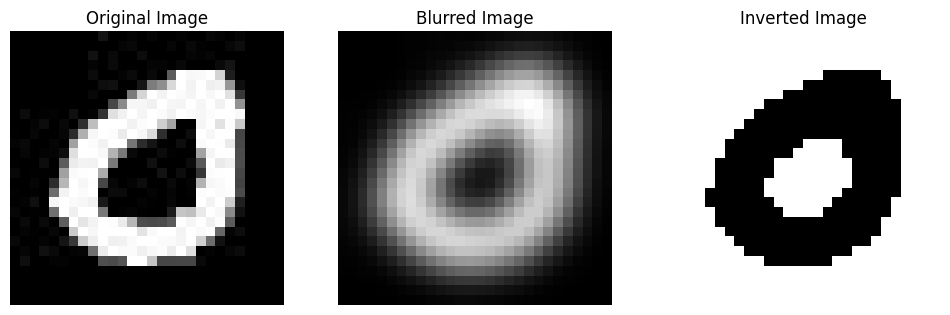

In [80]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

# Load an example MNIST image (replace this with your actual image loading code)
mnist_image_path = r"C:\Users\shova\Downloads\Compressed\trainingSet\trainingSet\0\img_635.jpg"
mnist_image = Image.open(mnist_image_path)

# Convert the image to NumPy array for processing
mnist_array = np.array(mnist_image)

# Apply Gaussian blur
blurred_array = Image.fromarray(mnist_array).filter(ImageFilter.GaussianBlur(radius=2))
blurred_array_np = np.array(blurred_array)  # Convert the blurred image to NumPy array

# Invert pixel values and apply threshold
inverted_array = np.where(blurred_array_np < 100, 255, 0).astype(np.uint8)

# Display the original, blurred, and inverted images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(mnist_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Blurred Image")
plt.imshow(blurred_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Inverted Image")
plt.imshow(inverted_array, cmap='gray')
plt.axis('off')

plt.show()
